In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv('../input/advertsuccess/Train.csv')

In [3]:
test=pd.read_csv('../input/advertsuccess/Test.csv')

In [4]:
train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [6]:
test.shape

(6513, 11)

In [7]:
train.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [8]:
train.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [9]:
train['netgain'].value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [10]:
count_F, count_T = train.netgain.value_counts()

# Divide by class
df_class_F = train[train['netgain'] == 0]
df_class_T = train[train['netgain'] == 1]

Random under-sampling:
True     6195
False    6195
Name: netgain, dtype: int64


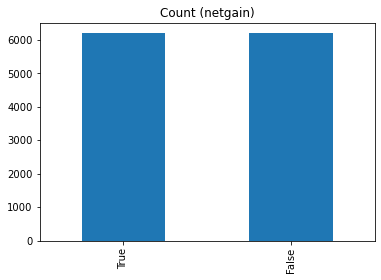

In [11]:
df_class_F_under = df_class_F.sample(count_T)
df_train = pd.concat([df_class_F_under, df_class_T], axis=0)

print('Random under-sampling:')
print(df_train.netgain.value_counts())

df_train.netgain.value_counts().plot(kind='bar', title='Count (netgain)');

In [ ]:
df_class_T_over = df_class_T.sample(count_F,replace=True)
df_train1 = pd.concat([df_class_F, df_class_T_over], axis=0)

print('Random under-sampling:')
print(df_train1.netgain.value_counts())

df_train1.netgain.value_counts().plot(kind='bar', title='Count (netgain)');

In [ ]:
df_test1_under.shape

In [ ]:
df_train1.shape

# correlation

In [ ]:
df_train['netgain'].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE 

#SMOTE have to be applied for training set only

#preprocessor = Pipeline(steps=[('encoder',encoding),('Std',StandardScaler())])

#X_train = preprocessor.fit_transform(X_train)
#X_test = preprocessor.transform(X_test)

#print("Shape of train dataset before applying SMOTE:",X_train.shape)

#X_train, y_train = SMOTE().fit_resample(X_train,y_train)

#print("Shape of train dataset after applying SMOTE:",X_train.shape)

In [ ]:
df_corr=df_train.corr()
f=plt.subplots(figsize=(10,8))
sns.heatmap(df_corr,annot=True)

In [ ]:
df_corr

In [ ]:
df_train[]

In [ ]:
sns.distplot(df_train['ratings'],bins=85)

In [ ]:
train['ratings'].skew()

In [ ]:
sns.distplot(df_train['average_runtime(minutes_per_week)'],bins=40)

# DATA VISULIZATION

In [ ]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='genre',kind='point')

In [ ]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='realtionship_status',kind='bar')

In [ ]:
sns.catplot(data=df_train,x='netgain',y='ratings',hue='industry',kind='bar')

In [ ]:
sns.relplot(data=df_train,x='ratings',y='average_runtime(minutes_per_week)',kind='line',color='red')

In [ ]:
C=['realtionship_status','genre','industry','expensive']
for i in C:
    sns.catplot(data=df_train,x=i,y='average_runtime(minutes_per_week)',hue='netgain')

In [ ]:
r=pd.get_dummies(df_train['targeted_sex'])
r1=(sum(r["Female"]),sum(r["Male"]))
plt.pie(r1,labels=["Male","Female"],shadow=True,explode=(.1,.1),autopct='%1.1f%%')

In [ ]:
r=pd.get_dummies(df_train['expensive'])
r1=(sum(r["High"]),sum(r["Low"]),sum(r["Medium"]))
plt.pie(r1,labels=["High","low","Medium"],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

In [ ]:
r=pd.get_dummies(df_train['airtime'])
r1=(sum(r["Primetime"]),sum(r["Morning"]),sum(r["Daytime"]))
plt.pie(r1,labels=["Primetime","Morning","Daytime"],shadow=True,explode=(.1,.1,.1),autopct='%1.1f%%')

In [ ]:
cr=pd.crosstab(df_train['industry'],df_train['netgain'],margins=True,)
print(cr)
plt.figure(figsize=(10,4))
sns.countplot(x='industry',hue='netgain',data=df_train,order=df_train['industry'].value_counts().index);

In [ ]:
cr1=pd.crosstab(df_train['genre'],df_train['netgain'],margins=True,)
print(cr1)
plt.figure(figsize=(10,4))
sns.countplot(x='genre',hue='netgain',data=df_train,order=df_train['genre'].value_counts().sort_values().index);

In [ ]:
cr2=pd.crosstab(df_train['realtionship_status'],df_train['netgain'],margins=True,)
print(cr2)
plt.figure(figsize=(20,8))
sns.countplot(x='realtionship_status',hue='netgain',data=df_train,order=df_train['realtionship_status'].value_counts().index);

In [ ]:
cr3=pd.crosstab(df_train['expensive'],df_train['netgain'],margins=True,)
print(cr3)
plt.figure(figsize=(10,4))
sns.countplot(x='expensive',hue='netgain',data=df_train,order=df_train['expensive'].value_counts().index);

In [ ]:
cr=pd.crosstab(df_train['targeted_sex'],df_train['netgain'],margins=True,)
print(cr)
plt.figure(figsize=(10,4))
sns.countplot(x='targeted_sex',hue='netgain',data=df_train,order=df_train['targeted_sex'].value_counts().index);

In [ ]:
sns.countplot(df_train.airtime,hue=df_train.netgain,color='blue')

In [ ]:
sns.kdeplot(df_train["average_runtime(minutes_per_week)"],color='b',shade=True)
plt.xlabel('average runtime') 
plt.ylabel('Probability Density') 

In [ ]:
rel=pd.crosstab(train["industry"],train["genre"])
rel

In [ ]:
rel=pd.crosstab(train["realtionship_status"],train["genre"])
rel

In [ ]:
rel=pd.crosstab(train["industry"],train["expensive"])
rel

In [ ]:
train.head(5)

In [12]:
def Interchange(data,variable):
    a=preprocessing.LabelEncoder()
    a.fit(data[variable])
    list(a.classes_)
    data[variable]=a.transform(data[variable])
    return(data[variable])

In [13]:
variable=['realtionship_status', 'industry', 'genre', 'targeted_sex','airtime', 'expensive', 'money_back_guarantee','airlocation','netgain']
for i in variable:
    Interchange(df_train,[i])
df_train.dtypes

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


id                                     int64
realtionship_status                    int64
industry                               int64
genre                                  int64
targeted_sex                           int64
average_runtime(minutes_per_week)      int64
airtime                                int64
airlocation                            int64
ratings                              float64
expensive                              int64
money_back_guarantee                   int64
netgain                                int64
dtype: object

In [ ]:
df_train.head(5)

In [14]:
x=df_train[['realtionship_status', 'industry', 'genre', 'targeted_sex','ratings','average_runtime(minutes_per_week)','expensive', 'money_back_guarantee','airlocation','airtime']]
y=df_train[['netgain']]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score



In [21]:
logreg=LogisticRegression()
#lr=LinearRegression()

In [20]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('RFC',RandomForestClassifier()))

In [22]:
logreg.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [42]:
c=[10,100]
solver=['liblinear','newton-cg','saga']
score=[]
for i in range(len(c)):
    for j in range(len(solver)):
        logreg=LogisticRegression(C=c[i],solver=solver[j])
        logreg.fit(x_train,y_train)
        y_test_pred=logreg.predict(x_test)
        score.append(accuracy_score(y_test,y_test_pred))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/

In [43]:
score

[0.7274683884853377,
 0.7288135593220338,
 0.6785041700295937,
 0.7309658326607479,
 0.7312348668280871,
 0.6785041700295937]

In [45]:
from sklearn.metrics import classification_report
logreg=LogisticRegression(C=100,solver='newton-cg')
logreg.fit(x_train,y_train)
y_test_pred=logreg.predict(x_test)
print(classification_report(y_test,y_test_pred))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.77      0.69      0.73      1924
           1       0.70      0.77      0.73      1793

    accuracy                           0.73      3717
   macro avg       0.73      0.73      0.73      3717
weighted avg       0.73      0.73      0.73      3717



In [23]:
predicted=logreg.predict(x_train)
Acc_score_tr=accuracy_score(y_train,predicted)
print('Accuracy score:',Acc_score_tr)

Accuracy score: 0.7084053960567278


In [32]:
estimators=[10,50,100]
rfcscore=[]
for i in range(len(estimators)):
    rfc=RandomForestClassifier(n_estimators=estimators[i])
    rfc.fit(x_train,y_train)
    y_pred1=rfc.predict(x_test)
    rfcscore.append(accuracy_score(y_test,y_pred1))


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [33]:
rfcscore

[0.7589453860640302, 0.7635189669087974, 0.7678235135862255]

In [ ]:
Con_matrix_tr=confusion_matrix(y_train,predicted)
print('Confusin metrix:',Con_matrix_tr)

In [ ]:
sns.heatmap(confusion_matrix(y_train,predicted))

In [ ]:
#fpr,tpr,thresholds=metrics.roc_auc_score(y_train,predicted)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_tr = average_precision_score(y_train, predicted)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tr))

In [ ]:
from sklearn.metrics import recall_score
Re_score_tr=recall_score(y_train, predicted)
print('recall_score on train set :',Re_score_tr)

In [ ]:
from sklearn.metrics import f1_score
F1_score_tr=f1_score(y_train, predicted)
print('F1_sccore on train set :',F1_score_tr)

In [ ]:
prediction = logreg.predict(x_test)
accuracy_score_ts= accuracy_score(y_test,prediction)
print('accuracy score on test  :',accuracy_score_ts)

In [ ]:
Con_matrix_ts=confusion_matrix(y_test,prediction)
print('Confusin metrix:',Con_matrix_ts)

In [ ]:
from sklearn.metrics import average_precision_score
average_precision_ts = average_precision_score(y_test, prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_ts))

In [ ]:
Re_score_ts=recall_score(y_test, prediction)
print('recall_score on train set :',Re_score_ts)

In [ ]:
F1_score_ts=f1_score(y_test, prediction)
print('F1_sccore on train set :',F1_score_ts)

In [ ]:
data=pd.DataFrame({'Accuracy_score':[Acc_score_tr,accuracy_score_ts],'Confusion_matrix':[Con_matrix_tr,Con_matrix_ts],
                  'Average_precision_score':[average_precision_tr,average_precision_ts],'recall_score':[Re_score_tr,Re_score_ts]
                  ,'f1_score':[F1_score_tr,F1_score_ts]},
                 index=['Train','Test'])

In [ ]:
np.transpose(data)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
cross_val_score(logreg,x,y,cv=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [ ]:
rfc2=RandomForestClassifier(n_estimators=300)
rfc2.fit(x_train,y_train)

In [ ]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

In [ ]:
confusion_matrix(y_train, rfc_prediction)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

In [ ]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

In [ ]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

In [ ]:
print('F1_sccore on train set :',f1_score(y_train, rfc_prediction))

In [ ]:
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)